# Group Project
by: Jenny Ren, 10/18/2020

## Problem Statement and Goal

## Highlights

- Proportion of Marijuana Use is higher in people with higher education
- Proportion of Marijuana Use is lower in people with employment 

## Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import pandas_profiling as pp
import joblib
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#from lightgbm import LGBMClassifier
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix

In [3]:
tp = pd.read_csv('./NSDUH_2018_Tab.tsv', sep='\t', iterator=True, chunksize=1000, low_memory=False)
df = pd.concat(tp, ignore_index=True)
# print(df.shape)
# print(df.dtypes)
df.head()

,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,11015143,10/08/2019,1,99,99,12,9999,99,1,20,...,3.0,2,2,1,1,2,2,20783.261908,40001,1
1,86325143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,2,2,3,3,2,2,1095.884074,40004,1
2,35425143,10/08/2019,1,99,99,13,9999,99,4,93,...,3.0,2,2,2,2,2,2,374.445005,40017,2
3,98125143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,2,2,2,2,2,2,2421.263435,40038,2
4,15945143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,1,2,1,1,2,2,6637.319591,40040,2


## Data Wrangling

### Check if data has duplicated records

In [4]:
dropdata = [985, 994, 997, 998]
df = df[~df.MJYRTOT.isin(dropdata)]

In [19]:
df1 = df[["QUESTID2","IREDUHIGHST2","IRWRKSTAT","MJYRTOT","SEXIDENT","HEALTH2","WRKDRGEDU","YELSTGRD","YEYATTAK","YERLGIMP",'IMPSOCM']]
df1.head()

,QUESTID2,IREDUHIGHST2,IRWRKSTAT,MJYRTOT,SEXIDENT,HEALTH2,WRKDRGEDU,YELSTGRD,YEYATTAK,YERLGIMP,IMPSOCM
0,11015143,8,1,991,1,3.0,1,99,99,99,99
1,86325143,11,1,991,1,3.0,2,99,99,99,99
2,35425143,8,2,5,3,3.0,2,99,99,99,1
3,98125143,9,4,991,1,3.0,99,99,99,99,99
4,15945143,7,1,991,1,3.0,2,99,99,99,99


In [20]:
# check if data has duplicates

df_duplicate = df1[df1.duplicated(keep = 'first')]
percent = df_duplicate.shape[0] / df1.shape[0] * 100
print('%d rows (%.2f %%) are duplicates' %(df_duplicate.shape[0], percent))

0 rows (0.00 %) are duplicates


### Check if data has missing values

In [21]:
# check if data has missing values
print(df1.isnull().sum())

QUESTID2         0
IREDUHIGHST2     0
IRWRKSTAT        0
MJYRTOT          0
SEXIDENT         0
HEALTH2         13
WRKDRGEDU        0
YELSTGRD         0
YEYATTAK         0
YERLGIMP         0
IMPSOCM          0
dtype: int64


In [22]:
df1.fillna(df1.mean(), inplace=True)

C:\Anaconda\Anaconda3\envs\insight\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### MJYRTOT 
- RANGE = 1 - 365
- 991 = NEVER USED MARIJUANA
- 993 = DID NOT USE MARIJUANA IN THE PAST 12 MOS

### IREDUHIGHST2 
- 1 = Fifth grade or less grade completed
- 2 = Sixth grade completed
- 3 = Seventh grade complete
- 4 = Eighth grade completed
- 5 = Ninth grade completed
- 6 = Tenth grade completed
- 7 = Eleventh or Twelfth grade completed, no diploma
- 8 = High school diploma/GED
- 9 = Some college credit, but no degree
- 10 = Associate's degree
- 11 = College graduate or higher

### IRWRKSTAT
- 1 = Employed full time
- 2 = Employed part time
- 3 = Unemployed
- 4 = Other (incl. not in labor force)
- 99 = 12-14 year olds

In [23]:
df1

,QUESTID2,IREDUHIGHST2,IRWRKSTAT,MJYRTOT,SEXIDENT,HEALTH2,WRKDRGEDU,YELSTGRD,YEYATTAK,YERLGIMP,IMPSOCM
0,11015143,8,1,991,1,3.0,1,99,99,99,99
1,86325143,11,1,991,1,3.0,2,99,99,99,99
2,35425143,8,2,5,3,3.0,2,99,99,99,1
3,98125143,9,4,991,1,3.0,99,99,99,99,99
4,15945143,7,1,991,1,3.0,2,99,99,99,99
...,...,...,...,...,...,...,...,...,...,...,...
56308,71224730,5,2,991,99,2.0,2,2,1,4,99
56309,69424730,7,2,260,99,2.0,1,2,1,1,99
56310,13024730,9,2,991,1,1.0,2,99,99,99,99
56311,85634730,8,1,300,1,2.0,2,99,99,99,99


In [24]:
df1 = df1.drop("QUESTID2", axis=1)
df1["IRWRKSTAT"] = df1["IRWRKSTAT"].apply(lambda x: 5 if x > 4 else x)
df1['MJYRTOT'] = df1['MJYRTOT'].apply(lambda x: 1 if x < 366 else 0)
df1['IMPSOCM'] = df1['IMPSOCM'].apply(lambda x: 6 if x > 5 else x)

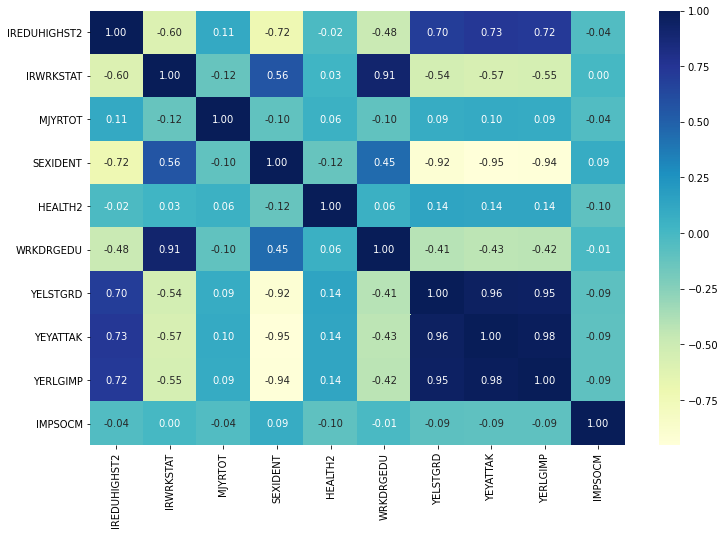

In [25]:
f = plt.figure(figsize=(12, 8))
corr_table = df1.corr(method='pearson')
sns.heatmap(corr_table, cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

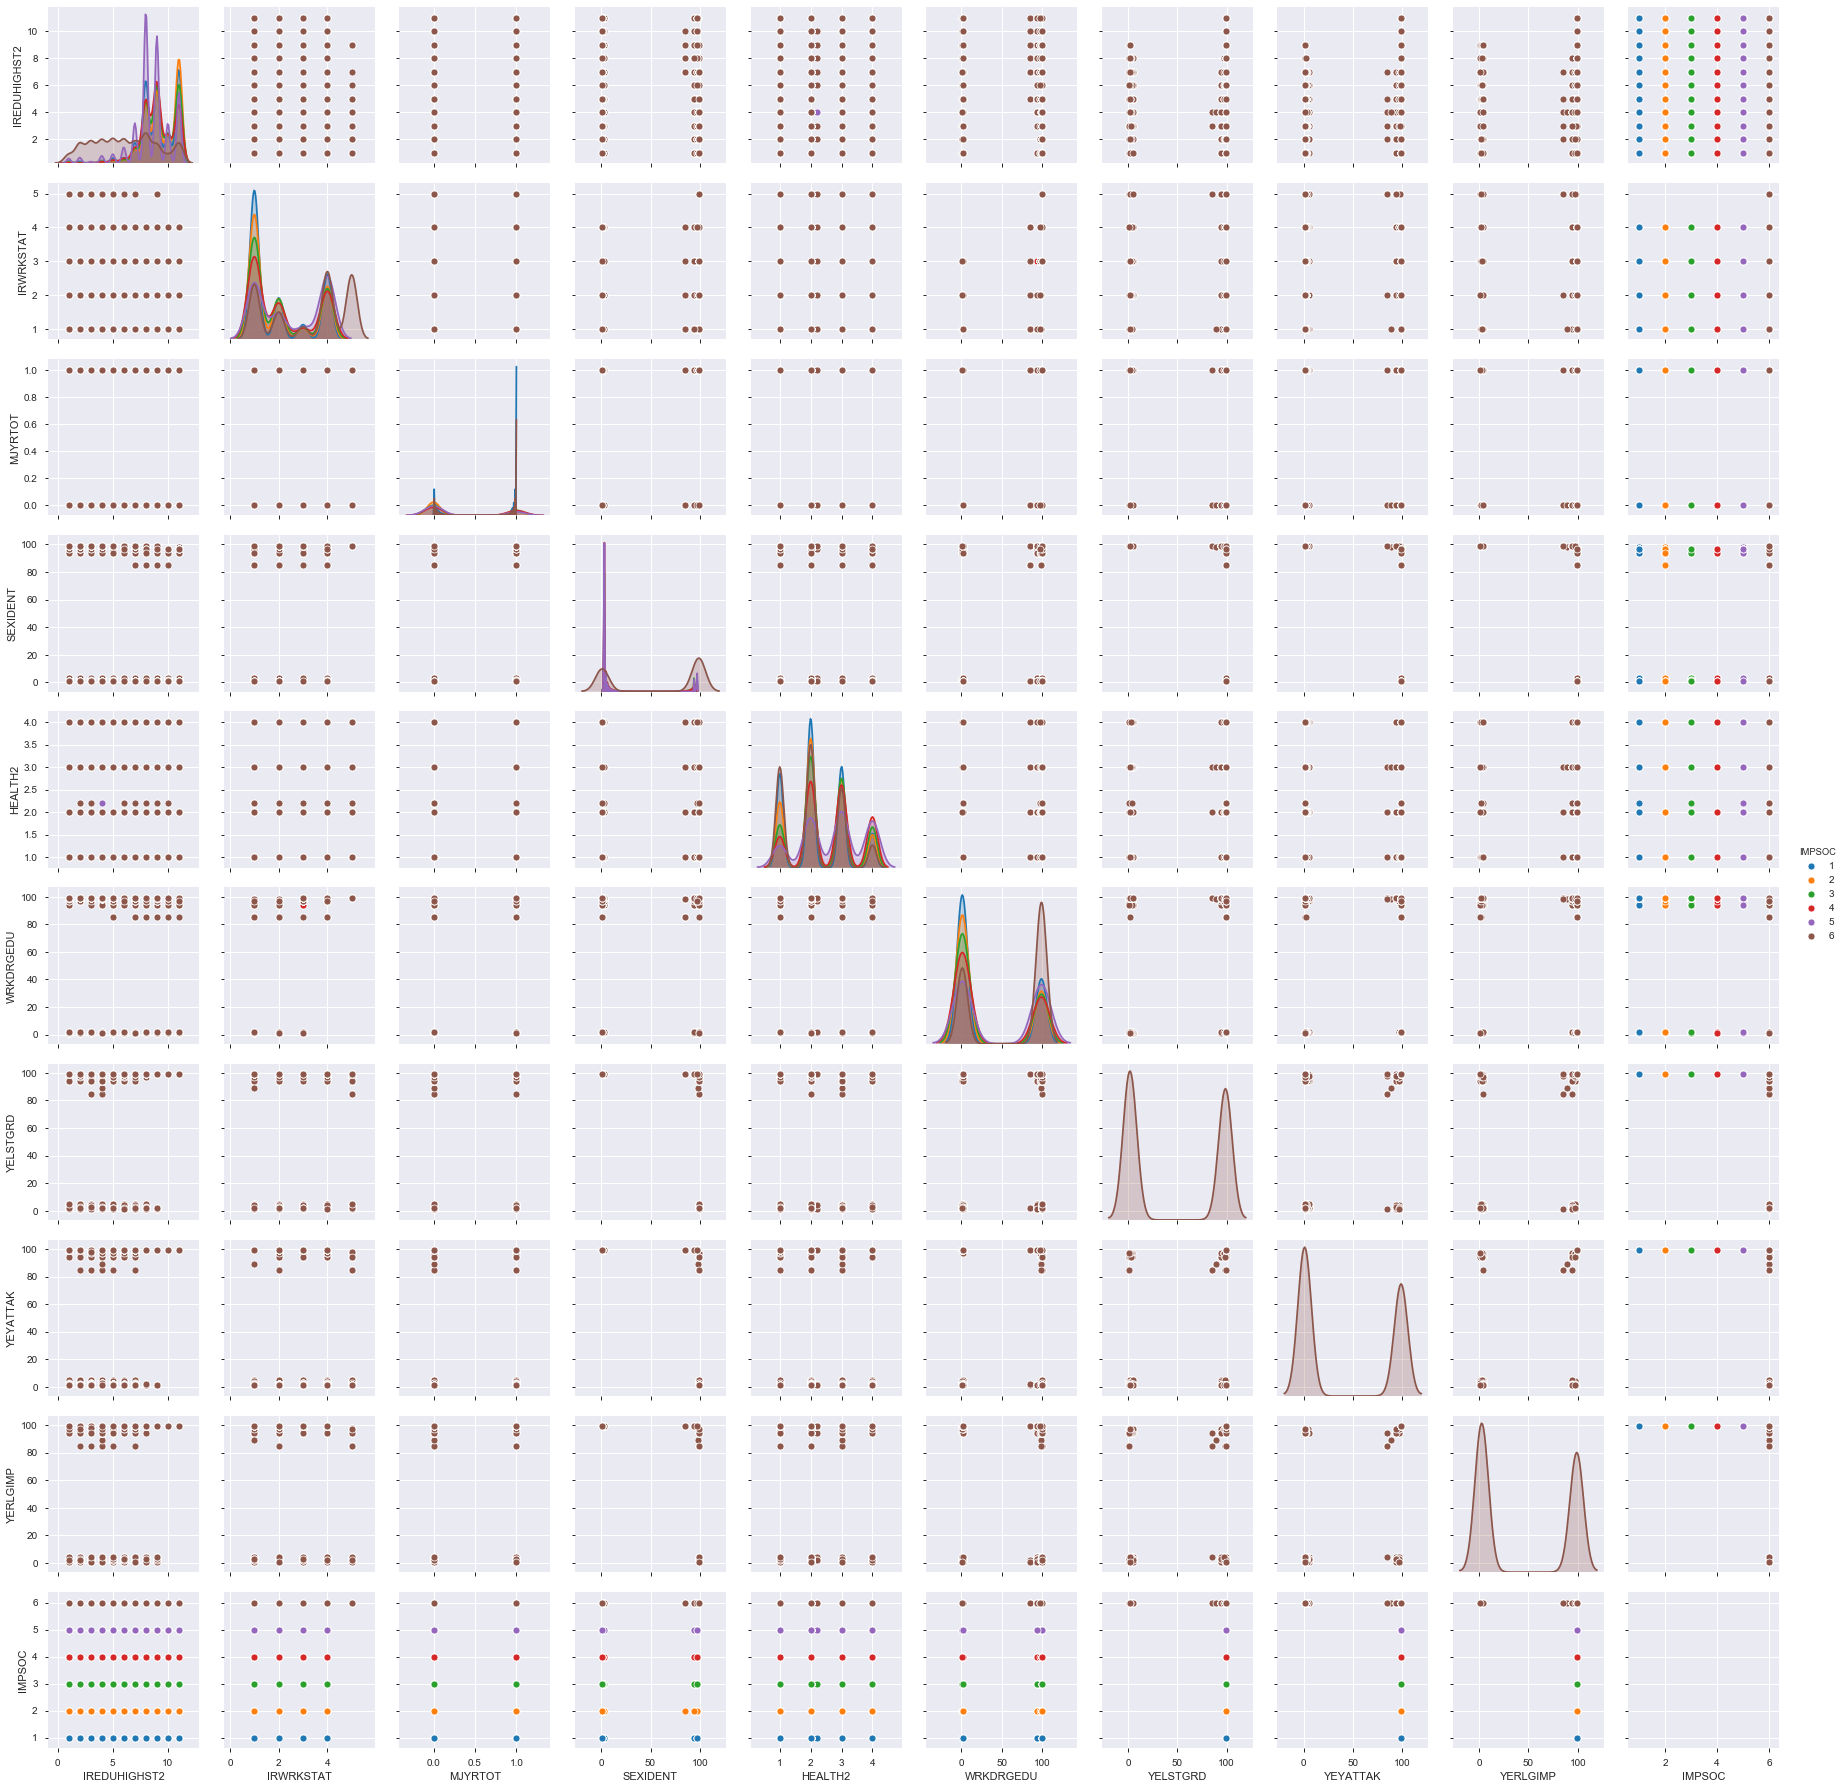

In [21]:
##### Basic correlogram

np.seterr(divide='ignore', invalid='ignore')

sns.pairplot(df1, hue = 'IMPSOCM')
plt.show()


In [26]:
########### Seperate X and Y    
y = df1['IMPSOCM']
X = df1.drop('IMPSOCM', axis=1)  

In [27]:
X

,IREDUHIGHST2,IRWRKSTAT,MJYRTOT,SEXIDENT,HEALTH2,WRKDRGEDU,YELSTGRD,YEYATTAK,YERLGIMP
0,8,1,0,1,3.0,1,99,99,99
1,11,1,0,1,3.0,2,99,99,99
2,8,2,1,3,3.0,2,99,99,99
3,9,4,0,1,3.0,99,99,99,99
4,7,1,0,1,3.0,2,99,99,99
...,...,...,...,...,...,...,...,...,...
56308,5,2,0,99,2.0,2,2,1,4
56309,7,2,1,99,2.0,1,2,1,1
56310,9,2,0,1,1.0,2,99,99,99
56311,8,1,1,1,2.0,2,99,99,99


In [28]:
############# Standard scaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [29]:
X

array([[ 0.05380506, -1.00805086, -0.49253305, ...,  0.52922636,
         0.55205837,  0.54354114],
       [ 1.16067461, -1.00805086, -0.49253305, ...,  0.52922636,
         0.55205837,  0.54354114],
       [ 0.05380506, -0.34959522,  2.03032062, ...,  0.52922636,
         0.55205837,  0.54354114],
       ...,
       [ 0.42276157, -0.34959522, -0.49253305, ...,  0.52922636,
         0.55205837,  0.54354114],
       [ 0.05380506, -1.00805086,  2.03032062, ...,  0.52922636,
         0.55205837,  0.54354114],
       [ 0.79171809, -1.00805086, -0.49253305, ...,  0.52922636,
         0.55205837,  0.54354114]])

In [30]:
############## train-test split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.3, random_state= 0)

In [31]:
def train_RFC(X_train, y_train):
    
    clf = RandomForestClassifier(n_estimators= 50, 
                                 criterion = 'gini', 
                                 max_depth = 100, 
                                 min_samples_split = 2, 
                                 random_state= 0, 
                                 oob_score = True,
                                 min_samples_leaf = 1,
                                 min_weight_fraction_leaf = 0.,
                                 max_features = 0.5,
                                 max_leaf_nodes = 1375,
                                 min_impurity_decrease = 0.,
                                 bootstrap = True,
                                 warm_start = True,
                                 class_weight = None
                                 )
    clf.fit(X_train, y_train)
    
    return (clf)

In [32]:
# Function to make predictions

def prediction(X_validate, clf):
    y_pred = clf.predict(X_validate)
    y_prob = clf.predict_proba(X_validate)
    
    return y_pred, y_prob

In [33]:
# Function to calculate accuracy

def cal_accuracy(y_validate, y_pred):
    conf_mtx = confusion_matrix(y_validate, y_pred)
    accuracy = accuracy_score(y_validate, y_pred) * 100
    report = classification_report(y_validate, y_pred)
    print("Confusion Matrix: ", conf_mtx)
    print("Accuracy: ", accuracy)
    print("Report: ", report)
    return conf_mtx

In [34]:
############ train with random forest
clf = train_RFC(X_train, y_train)
    
################ cross validation
scores = cross_val_score(clf, X, y, cv=5)
print('cross validation score: ', scores)

cross validation score:  [0.97125459 0.97089639 0.97089378 0.97125202 0.97125202]


In [35]:
y_pred = prediction(X_validate, clf)[0]
# y_prob = prediction(X_validate, clf)[1]
cal_accuracy(y_validate, y_pred)

Confusion Matrix:  [[    0     0   270]
 [    2     0   184]
 [    7     7 16280]]
Accuracy:  97.19402985074626
Report:                precision    recall  f1-score   support

           1       0.00      0.00      0.00       270
           2       0.00      0.00      0.00       186
           6       0.97      1.00      0.99     16294

    accuracy                           0.97     16750
   macro avg       0.32      0.33      0.33     16750
weighted avg       0.95      0.97      0.96     16750



array([[    0,     0,   270],
       [    2,     0,   184],
       [    7,     7, 16280]], dtype=int64)

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

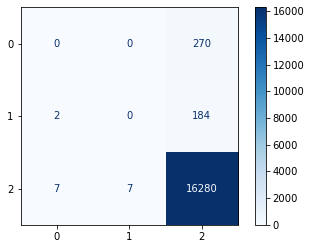

In [36]:
# Plot non-normalized confusion matrix

disp = plot_confusion_matrix(clf, X_validate, y_validate,
                            display_labels=("Not Use Tobacco", "Use Tobacco"),
                            values_format='d',
                            cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.grid(False)
plt.show()